In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline
import numpy as np

import sys
sys.path.append("../")

In [52]:
vs_16_18 = {
    "cornering_Raw_Hoosier_16x7.5-10_R20_7":{"long":None, "lat":None},
    "cornering_Raw_Hoosier_18x6.0-10_R20_7":{"long":None, "lat":None}
}

vs_LCO_R20 = {
    # "cornering_Raw_Hoosier_16x7.5-10_LCO_7":{"long":None, "lat":None},
    "cornering_Raw_Hoosier_16x7.5-10_R20_7":{"long":None, "lat":None}
}

tires_LCO_vs_R20 = {
    "cornering_Hoosier_16x7.5-10_LCO_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_R20_7":{"long":None, "lat":None}
}

tires_6_R20 = {
    "cornering_Hoosier_16x6.0-10_R20_6":{"long":None, "lat":None},
    "cornering_Hoosier_18x6.0-10_R20_6":{"long":None, "lat":None},
    "braking_Hoosier_18x6.0-10_R20_6":{"long":None, "lat":None}
    }

tires_6_LCO = {
    # "cornering_Hoosier_16x6.0-10_LCO_6":{"long":None, "lat":None},
    # "cornering_Hoosier_18x6.0-10_LCO_6":{"long":None, "lat":None},
    "braking_Hoosier_18x6.0-10_LCO_6":{"long":None, "lat":None}
    }

tires_7_R20 = {
    "cornering_Hoosier_16x6.0-10_R20_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_R20_7":{"long":None, "lat":None},
    "cornering_Hoosier_18x6.0-10_R20_7":{"long":None, "lat":None}
    # "braking_Hoosier_18x6.0-10_R20_7":{"long":None, "lat":None}
    }

tires_7_LCO = {
    "cornering_Hoosier_16x6.0-10_LCO_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_LCO_7":{"long":None, "lat":None},
    "cornering_Hoosier_18x6.0-10_LCO_7":{"long":None, "lat":None}
    # "braking_Hoosier_18x6.0-10_LCO_7":{"long":None, "lat":None}
    }

tires_8_R20 = {
    "cornering_Hoosier_16x7.5-10_R20_8":{"long":None, "lat":None}
    }

tires_8_LCO = {
    "cornering_Hoosier_16x7.5-10_LCO_8":{"long":None, "lat":None}
    }

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = -1

In [53]:
tire_16_18 = vs_16_18.items()

for name, tire in tire_16_18:
    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]
        
    except:
        print("Error getting lateral data for {0}".format(name))

In [54]:
tire_LCO_R20 = vs_LCO_R20.items()

for name, tire in tire_LCO_R20:
    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]
        
    except:
        print("Error getting lateral data for {0}".format(name))

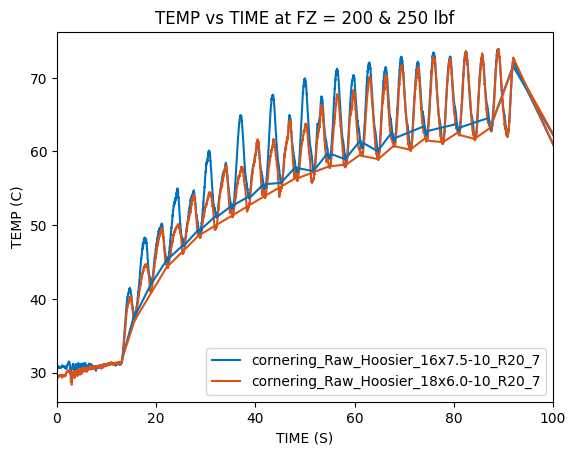

In [55]:
tire_lst = []

normal_loads = []

for name, tire in tire_16_18:
    for normal_load in tire["lat"]["load"].tolist():
        if normal_load in normal_loads:
            pass
        else:
            normal_loads.append(normal_load)

# print(normal_loads)

plt.figure()
colors = [[0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980]]
i = -1
for item in normal_loads[0:2]:
    for name, tire in tire_16_18:
        i += 1
        # print(name)
        temp = tire["lat"][tire["lat"]["load"] == item]

        x_lst = temp["ET"].tolist()
        y_lst = temp["TSTC"].tolist()

        plt.plot(x_lst, y_lst, color = colors[i])

        tire_lst.append(name)

        plt.title(f"TEMP vs TIME at FZ = 200 & 250 lbf")
        plt.xlabel("TIME (S)")
        plt.ylabel("TEMP (C)")
        plt.xlim(0, 100)

    plt.legend(tire_lst[0:2])